# All settings will be given to the channel 1 output, in the DC Amp out configuration

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 

# Visa interface for the M8190A instrument:

In [2]:
M8190A = VisaR(AWG_Settings2,60000)

In [4]:
Initialization(M8190A,AWG_Settings2)

Instruments Sampling Frecuency set to 5.00000000000000E+08Hz
Instruments DC1 Output Voltage set to 3.00000000000000E-01deciVolts


In [5]:
M8190A.query('*IDN?')

'Agilent Technologies,M8190A,MY57701776,5.6.0.0-2'

In [34]:
M8190A.write('*RST')

5

In [5]:
M8190A.query('FREQ:RAST?')

'5.00000000000000E+08'

In [6]:
M8190A.query('SYST:ERR?')

'0,"No error"'

In [7]:
print(M8190A)

TCPIPInstrument at TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR


In [6]:
M8190A.write('ABOR')

5

In [8]:
tic = time.time()

DataFramesPSscheme, DataFramesPSschemes2 , timeinterval = Sequence_Loader_List(PScheme,PScheme2,5,15,7500000,0,5,M8190A,AWG_Settings2,1,6)

toc = time.time()

dur = toc -tic

Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"
Sequence loaded with the following segment data "1,1,0,1,0,7499999,2,1,0,1,0,7499999"


In [9]:
dur

191.83281588554382

In [11]:
timeinterval

array([0.00000000e+00, 2.00000027e-06, 4.00000053e-06, ...,
       1.49999960e+01, 1.49999980e+01, 1.50000000e+01])

# Checking the Data Frames

In [9]:
DataFramesPSscheme

{'SegmentA_7500000_2':                Y1  SyncMarker1  SampleMarker1
 0        0.000000            1              1
 1        0.666667            1              1
 2        0.666667            1              1
 3        0.666667            1              1
 4        0.666667            1              1
 ...           ...          ...            ...
 7499995  0.000000            1              1
 7499996  0.000000            1              1
 7499997  0.000000            1              1
 7499998  0.000000            1              1
 7499999  0.000000            1              1
 
 [7500000 rows x 3 columns],
 'SegmentA_7500000_3':                Y1  SyncMarker1  SampleMarker1
 0        0.000000            1              1
 1        0.666667            1              1
 2        0.666667            1              1
 3        0.666667            1              1
 4        0.666667            1              1
 ...           ...          ...            ...
 7499995  0.000000            1 

In [10]:
DataFramesPSscheme['SegmentA_7500000_2']

,Y1,SyncMarker1,SampleMarker1
0,0.000000,1,1
1,0.666667,1,1
2,0.666667,1,1
3,0.666667,1,1
4,0.666667,1,1
...,...,...,...
7499995,0.000000,1,1
7499996,0.000000,1,1
7499997,0.000000,1,1
7499998,0.000000,1,1


In [21]:
DataFramesPSscheme['SegmentA_7500000_2']['Y1']

0          0.000000
1          0.666667
2          0.666667
3          0.666667
4          0.666667
             ...   
7499995    0.000000
7499996    0.000000
7499997    0.000000
7499998    0.000000
7499999    0.000000
Name: Y1, Length: 7500000, dtype: float64

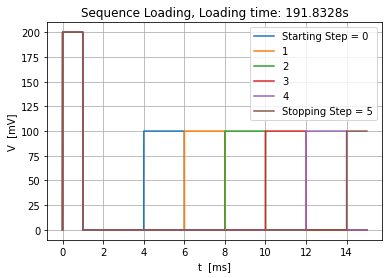

In [10]:
fig,ax= plt.subplots()

ax.grid(True)
plt.plot(timeinterval,DataFramesPSscheme['SegmentA_7500000_0']['Y1']*AWG_Settings2['Voltage Amplitude'],label= 'Starting Step = 0')
plt.plot(timeinterval,DataFramesPSscheme['SegmentA_7500000_1']['Y1']*AWG_Settings2['Voltage Amplitude'],label= '1')
plt.plot(timeinterval,DataFramesPSscheme['SegmentA_7500000_2']['Y1']*AWG_Settings2['Voltage Amplitude'],label= '2')
plt.plot(timeinterval,DataFramesPSscheme['SegmentA_7500000_3']['Y1']*AWG_Settings2['Voltage Amplitude'],label= '3')
plt.plot(timeinterval,DataFramesPSscheme['SegmentA_7500000_4']['Y1']*AWG_Settings2['Voltage Amplitude'],label= '4')
plt.plot(timeinterval,DataFramesPSscheme['SegmentA_7500000_5']['Y1']*AWG_Settings2['Voltage Amplitude'],label= 'Stopping Step = 5')
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ms]')
ax.set_title('Sequence Loading, Loading time: {ab:.3f}s'.format(ab=dur))
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

# Instrument settings after the loading.

In [24]:
M8190A.query('SEQ:CAT?')

'0,2,2,2,4,2'

In [28]:
M8190A.query('SEQ:DATA? 0,1,2')

'2,1,0,1,0,7499999,1,1,0,1,0,7499999'

In [30]:
M8190A.query('SEQ:DATA? 1,0,2')

'2,1,0,1,0,7499999,1,1,0,1,0,7499999'

In [31]:
M8190A.query('SEQ:DATA? 2,1,2')

'2,1,0,1,0,7499999,1,1,0,1,0,7499999'